In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt

from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


In [2]:
df = pd.read_csv("electra_modbus.csv")
df=df.drop('Time',axis=1) #remove timestamp
print('Dimensions of the dataset: ',df.shape)
print('Total of label for attacks and normal samples:')
print(df['label'].value_counts())
print()
df.head()

Dimensions of the dataset:  (16289277, 10)
Total of label for attacks and normal samples:
NORMAL                13894323
MITM_UNALTERED         1550617
READ_ATTACK             785961
RECOGNITION_ATTACK       30580
RESPONSE_ATTACK          16353
WRITE_ATTACK              9417
FORCE_ERROR_ATTACK        1129
REPLAY_ATTACK              897
Name: label, dtype: int64



,smac,dmac,sip,dip,request,fc,error,address,data,label
0,00:1b:1b:c1:41:1b,08:00:27:79:b0:4a,10.70.38.51,10.70.38.55,1,3,0,1,68,MITM_UNALTERED
1,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.51,10.70.38.55,1,3,0,1,68,MITM_UNALTERED
2,00:1b:1b:c1:41:1b,00:0e:8c:e1:de:9c,10.70.38.51,10.70.38.56,1,3,0,1,68,NORMAL
3,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.51,0,3,0,1,0,MITM_UNALTERED
4,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.51,0,3,0,2,0,MITM_UNALTERED


 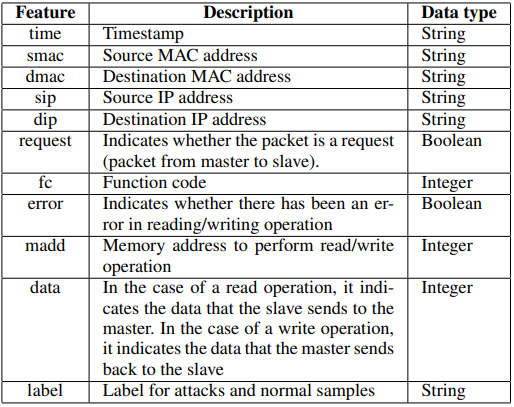

In [3]:
df.isnull().values.any() #check if there are missing values

False

In [4]:
for col_name in df.columns:
    unique_cat = len(df[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
    

Feature 'smac' has 4 categories
Feature 'dmac' has 4 categories
Feature 'sip' has 4 categories
Feature 'dip' has 4 categories
Feature 'request' has 2 categories
Feature 'fc' has 252 categories
Feature 'error' has 11 categories
Feature 'address' has 413 categories
Feature 'data' has 18379 categories
Feature 'label' has 8 categories



Due to limited layout space, only the eight largest unique categories were selected.

Feature 'smac' has 4 categories
00:0e:8c:e1:de:9c    13692956
00:0e:8c:e1:dd:58     1448634
08:00:27:79:b0:4a      932869
00:1b:1b:c1:41:1b      214818
Name: smac, dtype: int64



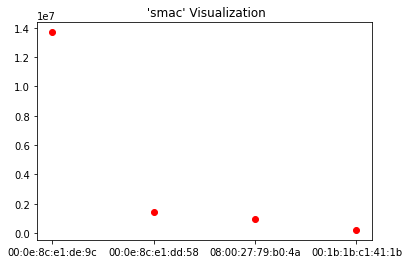



Feature 'dmac' has 4 categories
00:1b:1b:c1:41:1b    14571339
08:00:27:79:b0:4a     1462085
00:0e:8c:e1:de:9c      201367
00:0e:8c:e1:dd:58       54486
Name: dmac, dtype: int64



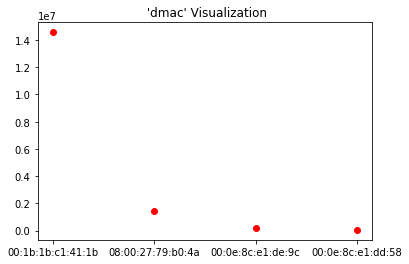



Feature 'sip' has 4 categories
10.70.38.56     13692956
10.70.38.55      2327017
10.70.38.51       228269
10.70.38.131       41035
Name: sip, dtype: int64



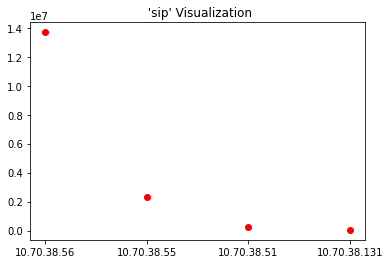



Feature 'dip' has 4 categories
10.70.38.51     15234153
10.70.38.131      785820
10.70.38.56       201367
10.70.38.55        67937
Name: dip, dtype: int64



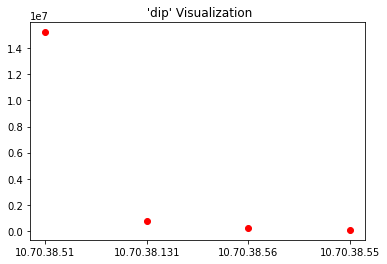



Feature 'request' has 2 categories
0    16009961
1      279316
Name: request, dtype: int64



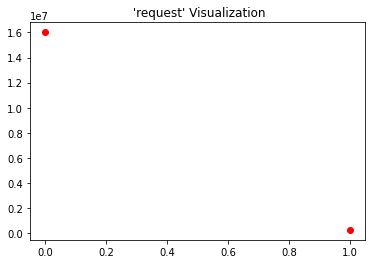



Feature 'fc' has 252 categories
3      16175882
2         73430
4         12032
16        10612
6          6798
144        2651
215          32
217          32
Name: fc, dtype: int64



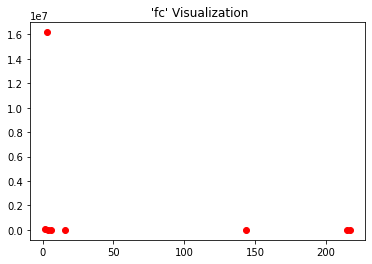



Feature 'error' has 11 categories
0      16285497
2          1799
3          1066
10          133
5           125
6           121
4           112
255         112
Name: error, dtype: int64



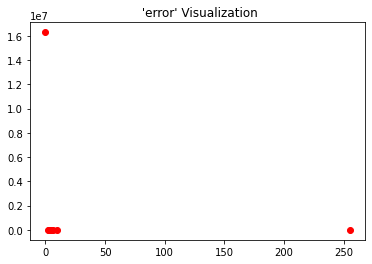



Feature 'address' has 413 categories
1     464413
43    232039
37    230989
55    230361
44    229875
45    229665
46    229444
47    229234
Name: address, dtype: int64



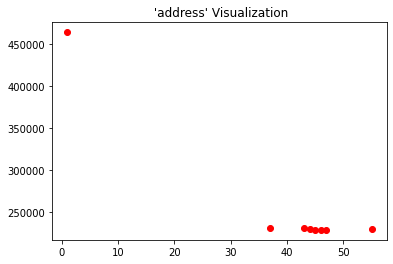



Feature 'data' has 18379 categories
0        11195643
65535     4624255
68         227491
17095       11157
16256        9085
18126        5200
65280        4739
17921        4692
Name: data, dtype: int64



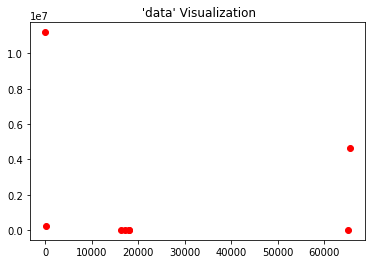



Feature 'label' has 8 categories
NORMAL                13894323
MITM_UNALTERED         1550617
READ_ATTACK             785961
RECOGNITION_ATTACK       30580
RESPONSE_ATTACK          16353
WRITE_ATTACK              9417
FORCE_ERROR_ATTACK        1129
REPLAY_ATTACK              897
Name: label, dtype: int64



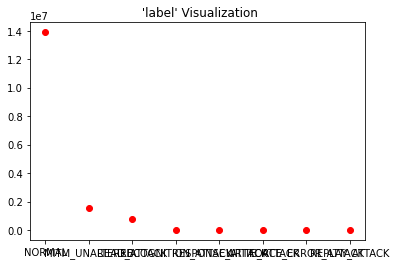

In [5]:
plt.rcParams["figure.figsize"] = (14,6)
for col_name in df.columns:
    unique_cat = len(df[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
    big_col = df[col_name].value_counts()
    print(big_col[0:8])
    print()
    plt.plot(big_col[0:8],'ro')
    plt.title(" '{col_name}' Visualization".format(col_name=col_name))
    plt.show()
    print()
    print("=======================================================================")
    print()

    
 

In [6]:
dfs = df.drop_duplicates()

print('After discard the duplicate data:',dfs.shape)
print('Total of label for attacks and normal samples:')
print(dfs['label'].value_counts())
print()

After discard the duplicate data: (41708, 10)
Total of label for attacks and normal samples:
NORMAL                24409
RESPONSE_ATTACK        6965
WRITE_ATTACK           6710
READ_ATTACK            2671
MITM_UNALTERED          622
RECOGNITION_ATTACK      252
REPLAY_ATTACK            69
FORCE_ERROR_ATTACK       10
Name: label, dtype: int64



Visualize discarded duplicate data

Feature 'smac' has 4 categories
00:0e:8c:e1:de:9c    24408
08:00:27:79:b0:4a    13364
00:0e:8c:e1:dd:58     3922
00:1b:1b:c1:41:1b       14
Name: smac, dtype: int64



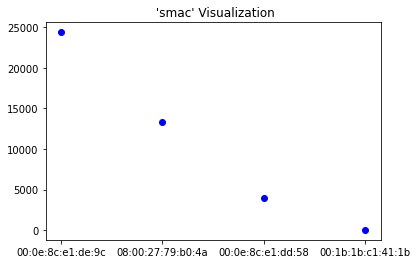



Feature 'dmac' has 4 categories
00:1b:1b:c1:41:1b    31911
00:0e:8c:e1:dd:58     5861
08:00:27:79:b0:4a     3935
00:0e:8c:e1:de:9c        1
Name: dmac, dtype: int64



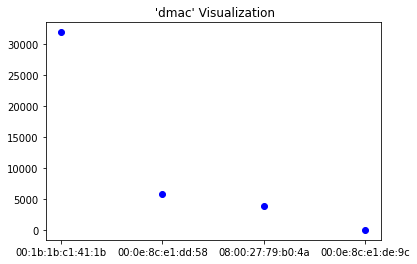



Feature 'sip' has 4 categories
10.70.38.56     24408
10.70.38.55     11425
10.70.38.131     5848
10.70.38.51        27
Name: sip, dtype: int64



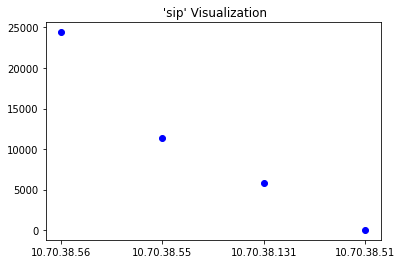



Feature 'dip' has 4 categories
10.70.38.51     31979
10.70.38.55      5874
10.70.38.131     3854
10.70.38.56         1
Name: dip, dtype: int64



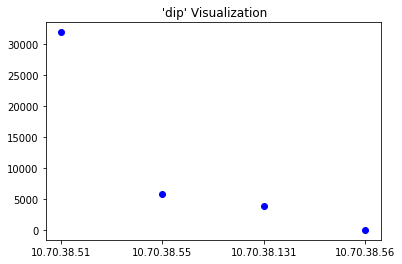



Feature 'request' has 2 categories
0    35830
1     5878
Name: request, dtype: int64



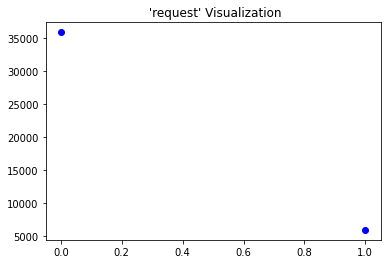



Feature 'fc' has 252 categories
3      33448
6       6709
2       1299
4          2
16         2
144        2
132        1
215        1
Name: fc, dtype: int64



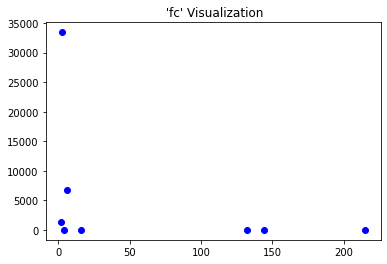



Feature 'error' has 11 categories
0    41696
3        2
2        2
4        1
6        1
5        1
1        1
8        1
Name: error, dtype: int64



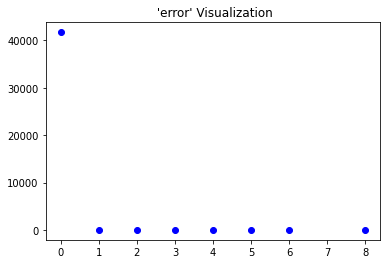



Feature 'address' has 413 categories
65311    2644
65303    1368
60007    1368
64       1358
16       1356
22       1355
62       1355
28       1351
Name: address, dtype: int64



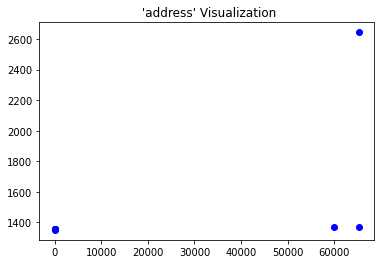



Feature 'data' has 18379 categories
0        1117
1536      252
64256     251
2560      250
2048      244
62720     242
62976     241
1280      240
Name: data, dtype: int64



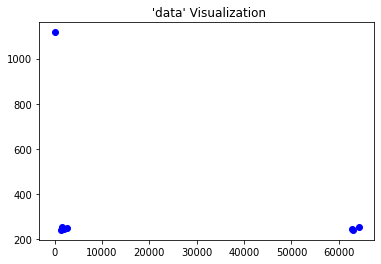



Feature 'label' has 8 categories
NORMAL                24409
RESPONSE_ATTACK        6965
WRITE_ATTACK           6710
READ_ATTACK            2671
MITM_UNALTERED          622
RECOGNITION_ATTACK      252
REPLAY_ATTACK            69
FORCE_ERROR_ATTACK       10
Name: label, dtype: int64



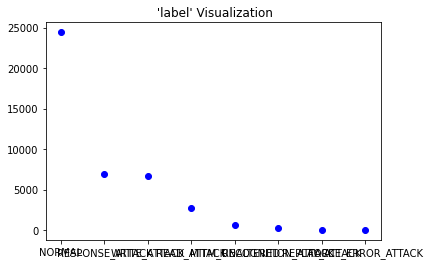

In [7]:
for col_name in dfs.columns:
    unique_cat = len(dfs[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
    big_col = dfs[col_name].value_counts()
    print(big_col[0:8])
    print()
    plt.plot(big_col[0:8],'bo')
    plt.title(" '{col_name}' Visualization".format(col_name=col_name))
    plt.show()
    print()
    print("=======================================================================")
    print()

    

**Data Preprocessing**

Using Label Encoding

In [8]:
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dfs)
data_le['dip'] = labelencoder.fit_transform(data_le['dip'])
data_le['sip'] = labelencoder.fit_transform(data_le['sip'])
data_le['dmac'] = labelencoder.fit_transform(data_le['dmac'])
data_le['smac'] = labelencoder.fit_transform(data_le['smac'])
data_le.head()


,smac,dmac,sip,dip,request,fc,error,address,data,label
0,2,3,1,2,1,3,0,1,68,MITM_UNALTERED
1,3,0,1,2,1,3,0,1,68,MITM_UNALTERED
2,2,1,1,3,1,3,0,1,68,NORMAL
3,0,3,2,1,0,3,0,1,0,MITM_UNALTERED
4,0,3,2,1,0,3,0,2,0,MITM_UNALTERED


**將處理好的資料透過 train_test_split 分成訓練資料集和測試資料集**


In [9]:
X = data_le.drop('label', axis=1)
y = data_le.label

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


**使用Random Forest 作為分類器並進行訓練**

n_estimators 設為 200


In [10]:
model = ensemble.RandomForestClassifier(n_estimators = 200,random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [11]:
y_predicted = model.predict(X_test)


**Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[   3,    0,    0,    0,    0,    0,    0,    0],
       [   0,  131,    0,    0,    0,    0,   69,    0],
       [   0,    0, 7300,    0,    0,    0,    0,    0],
       [   0,    0,    0,  815,    0,   16,    0,    0],
       [   0,    0,    0,    0,   74,    0,    0,    0],
       [   0,    0,    0,   19,    0,    2,    0,    0],
       [   0,   48,    0,    0,    0,    0, 2067,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1969]], dtype=int64)

Text(69.0, 0.5, 'Truth')

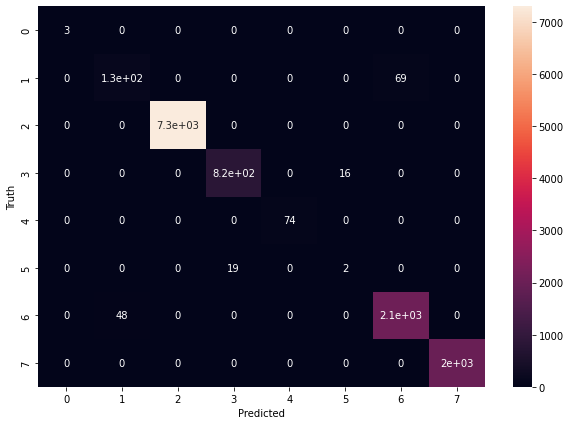

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [14]:
print('Accuracy: ',accuracy_score(y_test, y_predicted))
print()

print('Macro_precision: ',precision_score(y_test, y_predicted, average='macro'))
print('Micro_precision: ',precision_score(y_test, y_predicted, average='micro'))
print('Weighted_precision: ',precision_score(y_test, y_predicted, average='weighted'))
print()


print('Macro_recall: ',recall_score(y_test, y_predicted, average='macro'))
print('Micro_recall: ',recall_score(y_test, y_predicted, average='micro'))
print('Weighted_recall: ',recall_score(y_test, y_predicted, average='weighted'))
print()

print('Macro_f1: ',f1_score(y_test, y_predicted, average='macro'))
print('Micro_f1: ',f1_score(y_test, y_predicted, average='micro'))
print('Weighted_f1: ',f1_score(y_test, y_predicted, average='weighted'))
print()



Accuracy:  0.9878526332614082

Macro_precision:  0.8484836926454067
Micro_precision:  0.9878526332614082
Weighted_precision:  0.9872491620336761

Macro_recall:  0.838536143603305
Micro_recall:  0.9878526332614082
Weighted_recall:  0.9878526332614082

Macro_f1:  0.8431641277190889
Micro_f1:  0.9878526332614082
Weighted_f1:  0.9875116234083716

